In [222]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 300)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


In [224]:
'''# Step 1: Data Understanding, Preparation, and Pre-Processing'''

'# Step 1: Data Understanding, Preparation, and Pre-Processing'

In [225]:
train = pd.read_csv('C:/Users/Dell/Desktop/Upgrad/New folder/train.csv')
test = pd.read_csv('C:/Users/Dell/Desktop/Upgrad/New folder/test.csv')
submission = pd.read_csv('C:/Users/Dell/Desktop/Upgrad/New folder/sample (2).csv')
data_dic = pd.read_csv('C:/Users/Dell/Desktop/Upgrad/New folder/data_dictionary.csv')


In [226]:
df = pd.read_csv('C:/Users/Dell/Desktop/Upgrad/New folder/train.csv')
df_org = df.copy() #creating a copy of original data


In [227]:
len_rows, len_col = df.shape


In [228]:
df.head()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [229]:
df.info(verbose=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [230]:
df.describe(include = 'all')


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

In [231]:
df.describe()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [232]:
# Lets find out the number of columns having 'date','numeric','category'.
id_cols = ['id','circle_id']
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8']

cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID columns: %d\n#Date columns:%d\n#Numeric columns:%d\n#Category columns:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == len_col)

#ID columns: 2
#Date columns:9
#Numeric columns:155
#Category columns:6
True


In [233]:
# Load metadata for column descriptions
metadata_df = pd.read_csv('C:/Users/Dell/Desktop/Upgrad/New folder/data_dictionary.csv')


In [234]:
'''Handling missing values'''

'Handling missing values'

In [235]:
# look at missing value ratio in each column
df.isnull().sum()*100/df.shape[0]


id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

In [236]:
'''# Step 2: Exploratory Data Analysis

# Conduct exploratory data analysis and visualize the data
# Calculate correlation between variables
# Plot relevant visualizations
'''

'# Step 2: Exploratory Data Analysis\n\n# Conduct exploratory data analysis and visualize the data\n# Calculate correlation between variables\n# Plot relevant visualizations\n'

<Figure size 1500x700 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='arpu_6', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='arpu_7', ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='arpu_8', ylabel='Density'>

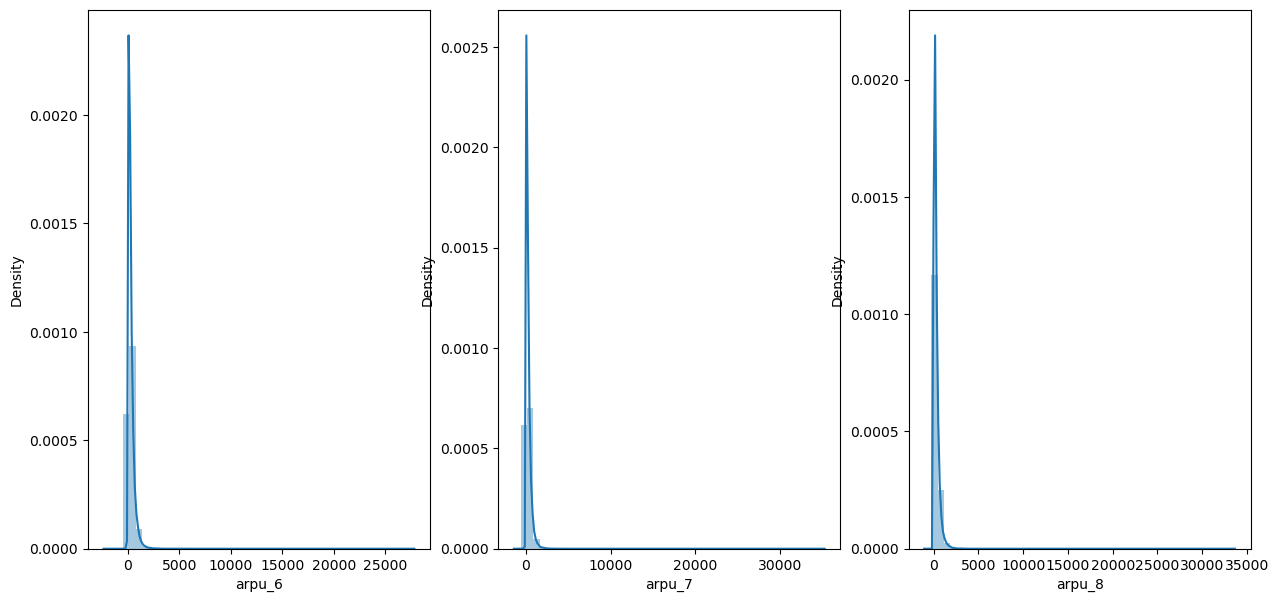

In [237]:
plt.figure(figsize=(15, 7))
plt.subplot(1,3,1)
sns.distplot(df['arpu_6'])
plt.subplot(1,3,2)
sns.distplot(df['arpu_7'])
plt.subplot(1,3,3)
sns.distplot(df['arpu_8'])

In [238]:
'''The distribution is left skewed. This indicates that very less number of users have spent high average 
revenue and more users spent low average revenue
'''

'The distribution is left skewed. This indicates that very less number of users have spent high average \nrevenue and more users spent low average revenue\n'

<Figure size 2000x1200 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='total_rech_data_6', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='total_rech_data_7', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='total_rech_data_8', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='max_rech_data_6'>

<AxesSubplot:>

<AxesSubplot:xlabel='max_rech_data_6'>

<AxesSubplot:>

<AxesSubplot:xlabel='max_rech_data_6'>

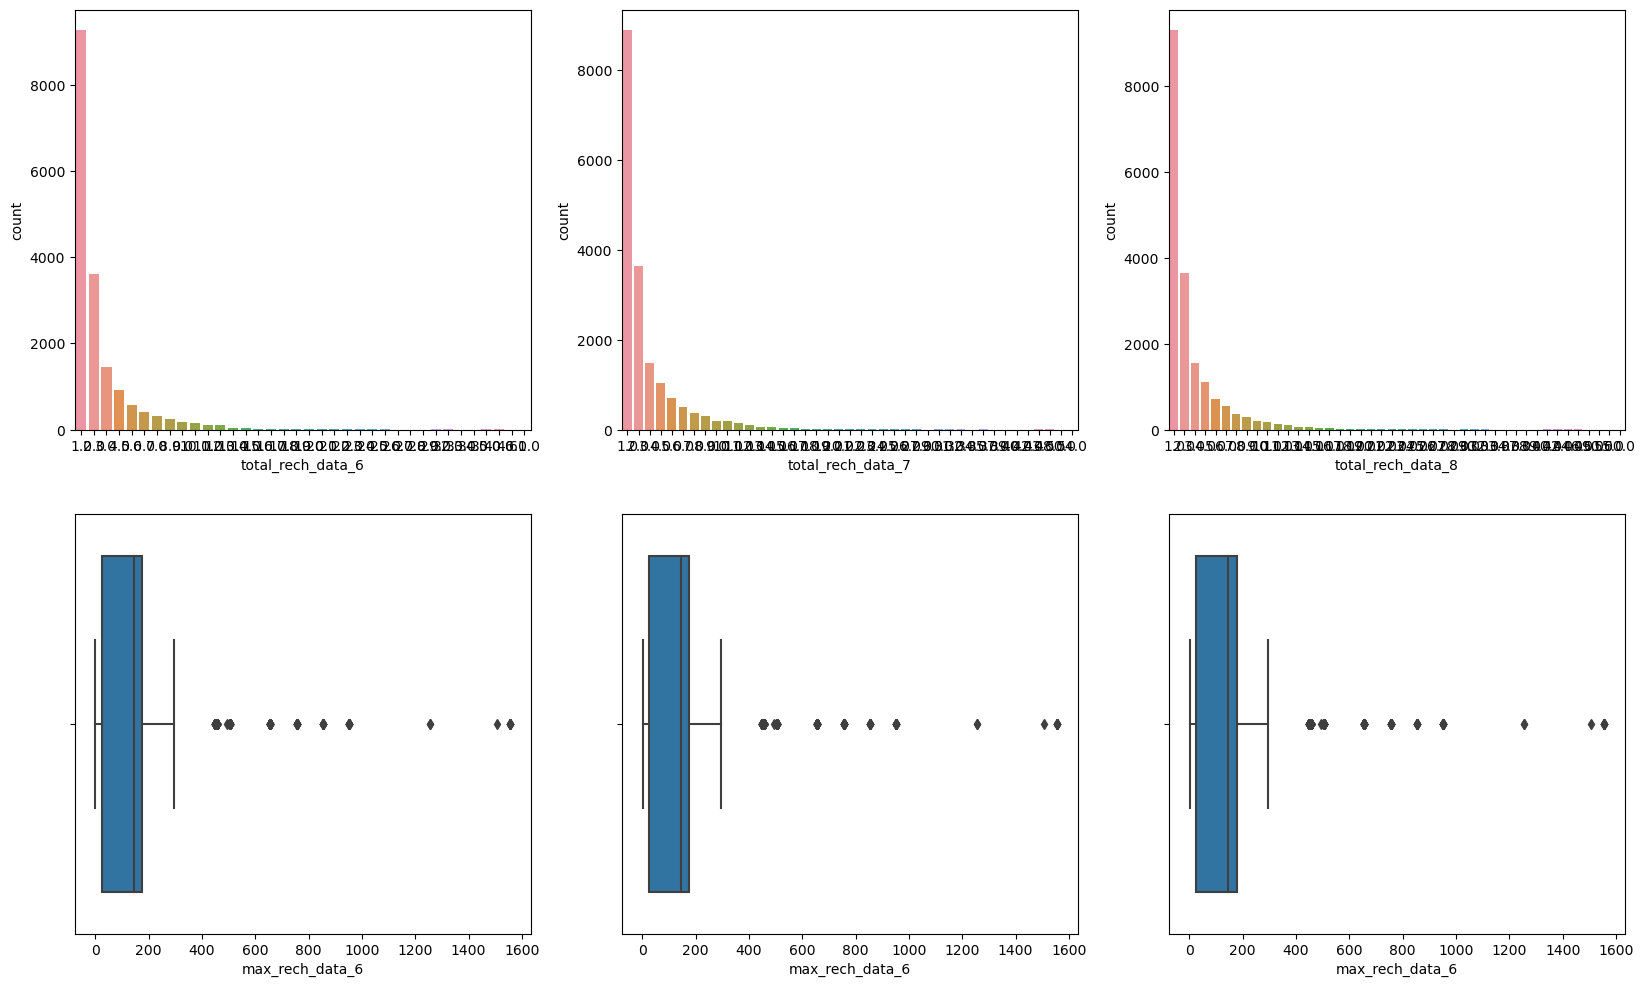

In [239]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'total_rech_data_6', data = df)

plt.subplot(2,3,2)
sns.countplot(x = 'total_rech_data_7',  data = df)

plt.subplot(2,3,3)
sns.countplot(x = 'total_rech_data_8', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'max_rech_data_6', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'max_rech_data_6',  data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'max_rech_data_6', data = df)
plt.show()


In [240]:
'''Total reach data of month 6, 7 and 8 are right skewed and Max_reach_data of every month is having outliers'''

'Total reach data of month 6, 7 and 8 are right skewed and Max_reach_data of every month is having outliers'

In [241]:
'''Handling Missing Values'''

'Handling Missing Values'

In [242]:
df.isnull().sum()*100/len_rows


id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

In [243]:
# understand which colums are having same values,
df.std() # check for standard deviation


id                   20207.115084
circle_id                0.000000
loc_og_t2o_mou           0.000000
std_og_t2o_mou           0.000000
loc_ic_t2o_mou           0.000000
                         ...     
aon                    952.426321
aug_vbc_3g             269.328659
jul_vbc_3g             267.899034
jun_vbc_3g             257.226810
churn_probability        0.302502
Length: 163, dtype: float64

In [244]:
#Impute missing values in the respective columns

# Imputing with zeroes
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]

df[recharge_cols].describe(include='all')


,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [245]:
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(10)


,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In [246]:
'''if a customer is not reacharging on a particular date of a month , then total_rech_data_ofmonth , 
date_of_last_rech_data_of month values remains empty
'''

'if a customer is not reacharging on a particular date of a month , then total_rech_data_ofmonth , \ndate_of_last_rech_data_of month values remains empty\n'

In [247]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))


In [248]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(df[zero_impute].isnull().sum()*100/df.shape[1])

# summary
print("\n\nSummary statistics\n")
print(df[zero_impute].describe(include='all'))


Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        69999.000000        69999.0000

In [249]:
print("Shape before dropping: ", df.shape)
df = df.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", df.shape)


Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 161)


In [250]:
#Replace NaN values in categorical variables

In [251]:
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))


In [252]:
print("Missing value ratio:\n")
print(df[cat_cols].isnull().sum()*100/df.shape[0])


Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [253]:
#Drop variables with more than a given threshold of missing values

In [254]:
initial_cols = df.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]


,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
156,aon,True
157,aug_vbc_3g,True
158,jul_vbc_3g,True
159,jun_vbc_3g,True


In [255]:
##  imputing using MICE
df = df.loc[:, include_cols]

dropped_cols = df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))


-12 columns dropped.


In [256]:
df.isna().any()


loc_og_t2o_mou        True
std_og_t2o_mou        True
loc_ic_t2o_mou        True
arpu_6               False
arpu_7               False
                     ...  
aon                  False
aug_vbc_3g           False
jul_vbc_3g           False
jun_vbc_3g           False
churn_probability    False
Length: 149, dtype: bool

In [257]:
df.std()


loc_og_t2o_mou         0.000000
std_og_t2o_mou         0.000000
loc_ic_t2o_mou         0.000000
arpu_6               334.213918
arpu_7               344.366927
                        ...    
aon                  952.426321
aug_vbc_3g           269.328659
jul_vbc_3g           267.899034
jun_vbc_3g           257.226810
churn_probability      0.302502
Length: 149, dtype: float64

In [258]:
same_val_col = ["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou"]


In [259]:
df = df.drop(same_val_col, axis=1)


In [260]:
df.isna().any()


arpu_6               False
arpu_7               False
arpu_8               False
onnet_mou_6           True
onnet_mou_7           True
                     ...  
aon                  False
aug_vbc_3g           False
jul_vbc_3g           False
jun_vbc_3g           False
churn_probability    False
Length: 146, dtype: bool

In [261]:
nan_list = df.columns[df.isna().any()].tolist()


In [262]:
for i in nan_list:
    
    df[i] = df[i].fillna(0)


In [263]:
df.columns[df.isna().any()].tolist()


[]

In [264]:
print(df.isnull().sum()*100/df.shape[0])


arpu_6               0.0
arpu_7               0.0
arpu_8               0.0
onnet_mou_6          0.0
onnet_mou_7          0.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 146, dtype: float64


In [265]:
'''Now you can see there is No null value in data set'''

'Now you can see there is No null value in data set'

In [266]:
#filter high-value customers

In [267]:
'''For Calculating high-value, we look into the month of june and july

formula to calculate total data recharge amount = number of recharges * avg recharge amount
'''

'For Calculating high-value, we look into the month of june and july\n\nformula to calculate total data recharge amount = number of recharges * avg recharge amount\n'

In [268]:
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [269]:
'''To find the total amount spent by the customer for recharge for a particular 
   month = total data recharge + total recharge
'''

'To find the total amount spent by the customer for recharge for a particular \n   month = total data recharge + total recharge\n'

In [270]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7


In [271]:
# calculate average recharge done by customer in June and July
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2


In [272]:
'''Here high value customers are treated as those who spent greater than the 70 percentile, 
choise can be 80 percentile also
'''

'Here high value customers are treated as those who spent greater than the 70 percentile, \nchoise can be 80 percentile also\n'

In [273]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))


Recharge amount at 70th percentile: 477.5


In [274]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
df_churn_filtered = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
df_churn_filtered = df_churn_filtered.reset_index(drop=True)
df_churn_filtered.shape


(21013, 151)

In [275]:
# delete variables created to filter high-value customers
df_churn_filtered = df_churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df_churn_filtered.shape


(21013, 146)

In [276]:
'''We're left with 21013 rows after selecting the customers who have provided recharge value of more than or 
equal to the recharge value of the 70th percentile customer.
'''

"We're left with 21013 rows after selecting the customers who have provided recharge value of more than or \nequal to the recharge value of the 70th percentile customer.\n"

In [277]:
'''Calculating the difference between the 8th month and the average of the 6th and 7 th month'''

'Calculating the difference between the 8th month and the average of the 6th and 7 th month'

In [278]:
df_churn_filtered['arpu_diff'] = df_churn_filtered.arpu_8 - ((df_churn_filtered.arpu_6 + df_churn_filtered.arpu_7)/2)

df_churn_filtered['onnet_mou_diff'] = df_churn_filtered.onnet_mou_8 - ((df_churn_filtered.onnet_mou_6 + df_churn_filtered.onnet_mou_7)/2)

df_churn_filtered['offnet_mou_diff'] = df_churn_filtered.offnet_mou_8 - ((df_churn_filtered.offnet_mou_6 + df_churn_filtered.offnet_mou_7)/2)

df_churn_filtered['roam_ic_mou_diff'] = df_churn_filtered.roam_ic_mou_8 - ((df_churn_filtered.roam_ic_mou_6 + df_churn_filtered.roam_ic_mou_7)/2)

df_churn_filtered['roam_og_mou_diff'] = df_churn_filtered.roam_og_mou_8 - ((df_churn_filtered.roam_og_mou_6 + df_churn_filtered.roam_og_mou_7)/2)

df_churn_filtered['loc_og_mou_diff'] = df_churn_filtered.loc_og_mou_8 - ((df_churn_filtered.loc_og_mou_6 + df_churn_filtered.loc_og_mou_7)/2)

df_churn_filtered['std_og_mou_diff'] = df_churn_filtered.std_og_mou_8 - ((df_churn_filtered.std_og_mou_6 + df_churn_filtered.std_og_mou_7)/2)

df_churn_filtered['isd_og_mou_diff'] = df_churn_filtered.isd_og_mou_8 - ((df_churn_filtered.isd_og_mou_6 + df_churn_filtered.isd_og_mou_7)/2)

df_churn_filtered['spl_og_mou_diff'] = df_churn_filtered.spl_og_mou_8 - ((df_churn_filtered.spl_og_mou_6 + df_churn_filtered.spl_og_mou_7)/2)

df_churn_filtered['total_og_mou_diff'] = df_churn_filtered.total_og_mou_8 - ((df_churn_filtered.total_og_mou_6 + df_churn_filtered.total_og_mou_7)/2)

df_churn_filtered['loc_ic_mou_diff'] = df_churn_filtered.loc_ic_mou_8 - ((df_churn_filtered.loc_ic_mou_6 + df_churn_filtered.loc_ic_mou_7)/2)

df_churn_filtered['std_ic_mou_diff'] = df_churn_filtered.std_ic_mou_8 - ((df_churn_filtered.std_ic_mou_6 + df_churn_filtered.std_ic_mou_7)/2)

df_churn_filtered['isd_ic_mou_diff'] = df_churn_filtered.isd_ic_mou_8 - ((df_churn_filtered.isd_ic_mou_6 + df_churn_filtered.isd_ic_mou_7)/2)

df_churn_filtered['spl_ic_mou_diff'] = df_churn_filtered.spl_ic_mou_8 - ((df_churn_filtered.spl_ic_mou_6 + df_churn_filtered.spl_ic_mou_7)/2)

df_churn_filtered['total_ic_mou_diff'] = df_churn_filtered.total_ic_mou_8 - ((df_churn_filtered.total_ic_mou_6 + df_churn_filtered.total_ic_mou_7)/2)

df_churn_filtered['total_rech_num_diff'] = df_churn_filtered.total_rech_num_8 - ((df_churn_filtered.total_rech_num_6 + df_churn_filtered.total_rech_num_7)/2)

df_churn_filtered['total_rech_amt_diff'] = df_churn_filtered.total_rech_amt_8 - ((df_churn_filtered.total_rech_amt_6 + df_churn_filtered.total_rech_amt_7)/2)

df_churn_filtered['max_rech_amt_diff'] = df_churn_filtered.max_rech_amt_8 - ((df_churn_filtered.max_rech_amt_6 + df_churn_filtered.max_rech_amt_7)/2)

df_churn_filtered['total_rech_data_diff'] = df_churn_filtered.total_rech_data_8 - ((df_churn_filtered.total_rech_data_6 + df_churn_filtered.total_rech_data_7)/2)

df_churn_filtered['max_rech_data_diff'] = df_churn_filtered.max_rech_data_8 - ((df_churn_filtered.max_rech_data_6 + df_churn_filtered.max_rech_data_7)/2)

df_churn_filtered['av_rech_amt_data_diff'] = df_churn_filtered.av_rech_amt_data_8 - ((df_churn_filtered.av_rech_amt_data_6 + df_churn_filtered.av_rech_amt_data_7)/2)

df_churn_filtered['vol_2g_mb_diff'] = df_churn_filtered.vol_2g_mb_8 - ((df_churn_filtered.vol_2g_mb_6 + df_churn_filtered.vol_2g_mb_7)/2)

df_churn_filtered['vol_3g_mb_diff'] = df_churn_filtered.vol_3g_mb_8 - ((df_churn_filtered.vol_3g_mb_6 + df_churn_filtered.vol_3g_mb_7)/2)



In [279]:
#summary of one of the difference variables
df_churn_filtered['max_rech_amt_diff'].describe()


count    21013.000000
mean       -10.423048
std        132.730444
min      -1901.000000
25%        -33.000000
50%          0.000000
75%         25.000000
max       3949.000000
Name: max_rech_amt_diff, dtype: float64

In [280]:
df_churn_filtered.shape


(21013, 169)

In [281]:
num_cols = [column for column in df_churn_filtered.columns if column not in cat_cols]
len(num_cols)


163

In [282]:
#Data Visvalization by Univariate and Bi variate Analysis

In [283]:
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

In [284]:
#Univariate EDA

count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


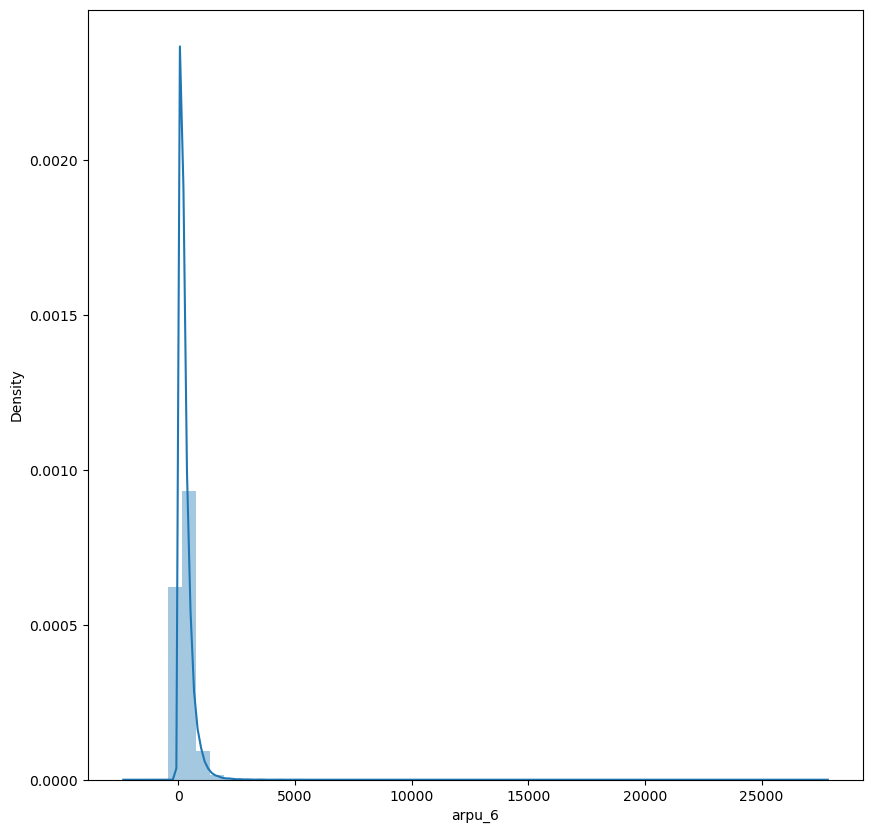

In [285]:
univariate(df.arpu_6)


count    69999.000000
mean       278.185912
std        344.366927
min      -1289.715000
25%         86.714000
50%        191.588000
75%        365.369500
max      35145.834000
Name: arpu_7, dtype: float64


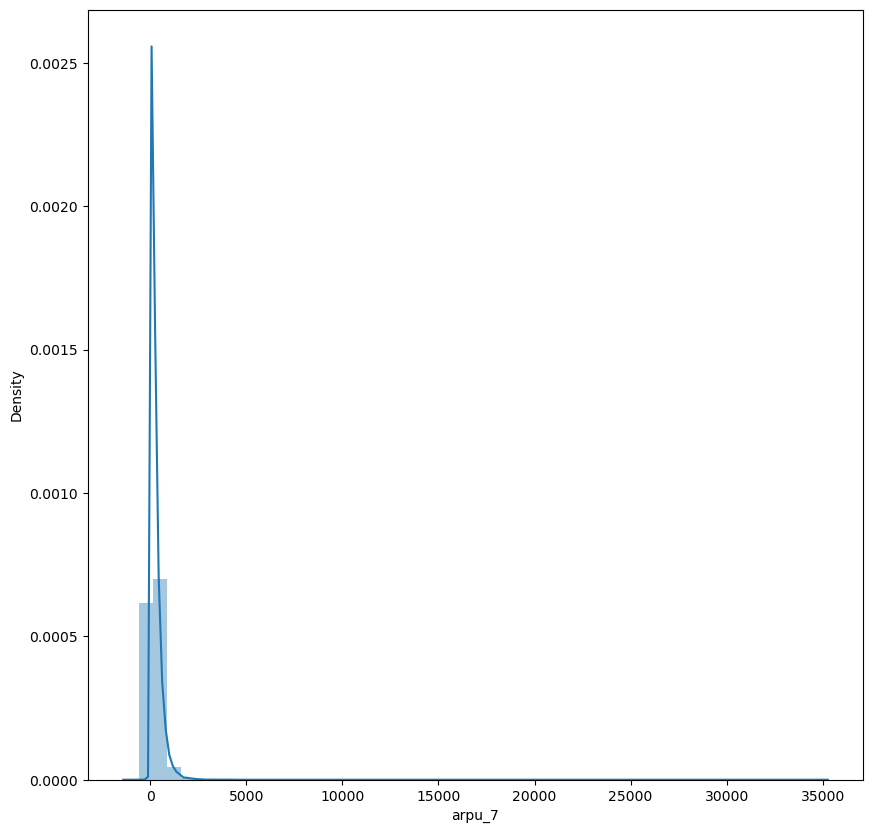

In [286]:
univariate(df.arpu_7)


count    69999.000000
mean       278.858826
std        351.924315
min       -945.808000
25%         84.095000
50%        192.234000
75%        369.909000
max      33543.624000
Name: arpu_8, dtype: float64


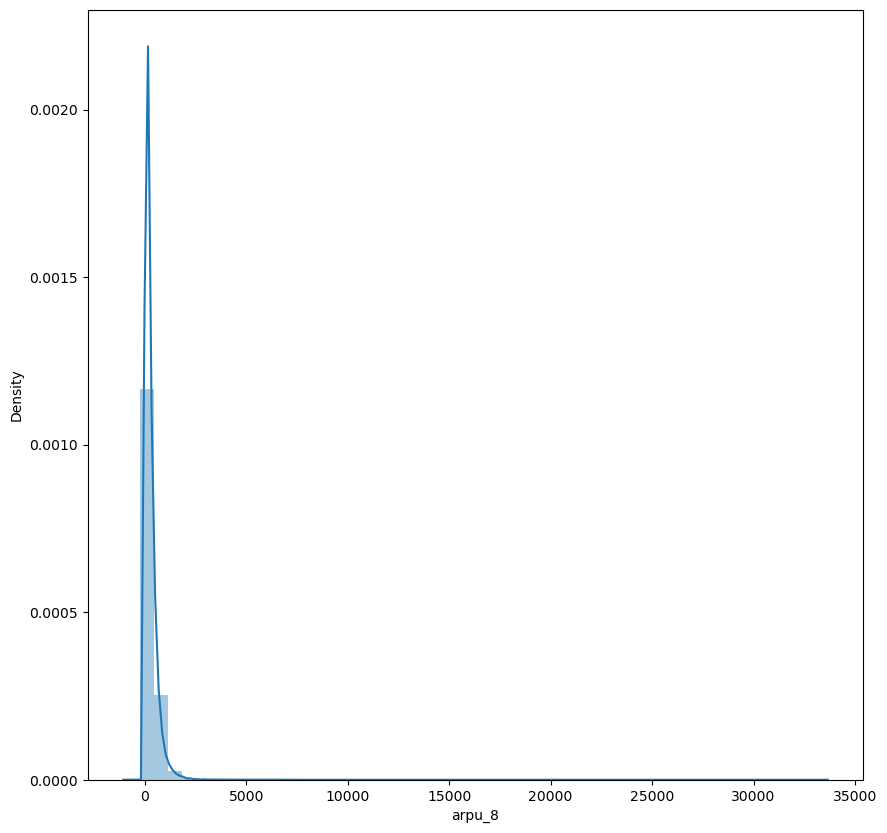

In [287]:
univariate(df.arpu_8)


count    69999.000000
mean       125.943607
std        304.990552
min          0.000000
25%          4.110000
50%         27.840000
75%        106.280000
max      10752.560000
Name: onnet_mou_8, dtype: float64


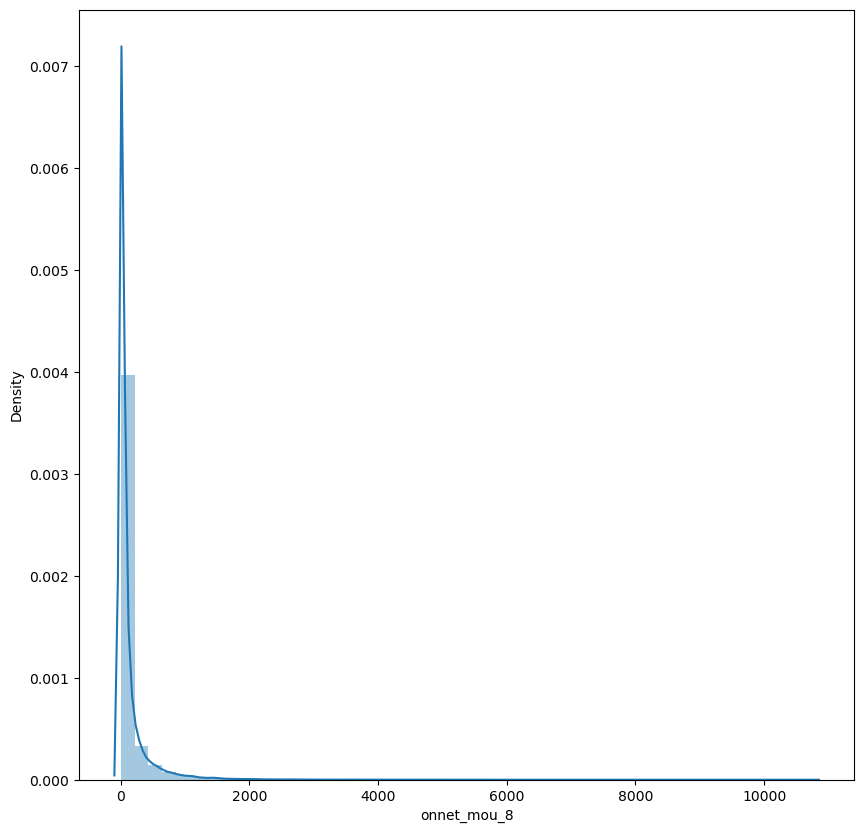

In [288]:
univariate(df.onnet_mou_8)


In [289]:
#Bi-variatte EDA

In [290]:
df_churn_filtered.head()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,25,10,30,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,-82.8845,-6.925,-37.920,-26.82,-7.865,-26.665,-2.175,0.0,-8.500,-37.340,12.860,0.000,0.0,0.000,12.860,-3.5,-91.0,-15.5,-1.0,-8.0,-41.0,-136.375,0.00
1,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,1.0,0.0,1.0,154.0,0.0,154.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,0.0,-1.0,0.0,1,0,1,0,0,0,

In [291]:
df_churn_filtered['onnet_mou_6'].dtype


dtype('float64')

In [292]:
pd.crosstab(df_churn_filtered.night_pck_user_8, df_churn_filtered.sachet_3g_8)


sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,29,30,38,41
night_pck_user_8,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1.0,9833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.0,9219,1117,264,118,60,48,25,19,17,10,9,7,3,6,1,3,2,0,3,1,3,1,1,0,1,0,1,1
1.0,84,60,18,20,9,14,4,5,5,4,2,0,5,2,1,1,0,2,0,0,0,1,1,1,0,1,0,0


In [293]:
#Cap outliers in all numeric variables with k-sigma technique

In [294]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array


In [295]:
sample_array = list(range(100))


In [296]:
# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))


Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [297]:
# cap outliers in the numeric columns
df_churn_filtered[num_cols] = df_churn_filtered[num_cols].apply(cap_outliers, axis=0)

In [298]:
#Model Predictions

In [299]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [300]:
df_churn_filtered['churn_probability'] = pd.to_numeric(df_churn_filtered['churn_probability'])#["churn_probability"]


In [301]:
X = df_churn_filtered.drop("churn_probability", axis = 1)
y = df_churn_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)


In [302]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((15759, 168), (15759,), (5254, 168), (5254,))

In [303]:
#Aggregating the categorical columns

In [304]:
train = pd.concat([X_train, y_train], axis=1)
# aggregate the categorical variables


In [305]:
train.groupby('night_pck_user_6').churn_probability.mean()


night_pck_user_6
-1.0    0.091037
 0.0    0.061534
 1.0    0.110355
Name: churn_probability, dtype: float64

In [306]:
train.groupby('night_pck_user_7').churn_probability.mean()


night_pck_user_7
-1.0    0.106008
 0.0    0.051774
 1.0    0.049518
Name: churn_probability, dtype: float64

In [307]:
train.groupby('night_pck_user_8').churn_probability.mean()


night_pck_user_8
-1.0    0.129077
 0.0    0.027976
 1.0    0.019661
Name: churn_probability, dtype: float64

In [308]:
train.groupby('fb_user_7').churn_probability.mean()


fb_user_7
-1.0    0.106008
 0.0    0.059332
 1.0    0.051071
Name: churn_probability, dtype: float64

In [309]:
mapping = {'night_pck_user_6' : {-1:  0.091037, 0: 0.061534, 1: 0.110355},
           'night_pck_user_7' : {-1: 0.106008, 0: 0.051774, 1: 0.049518},
           'night_pck_user_8' : {-1: 0.129077, 0: 0.027976, 1: 0.019661},
           'fb_user_6'        : {-1: 0.091037, 0: 0.067671, 1: 0.062284},
           'fb_user_7'        : {-1: 0.106008, 0: 0.059332, 1: 0.051071},
           'fb_user_8'        : {-1: 0.129077, 0: 0.071381, 1: 0.022682}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)


In [310]:
cat_X_train = [col for col in cat_cols if col not in ['df']]
X_train[cat_X_train].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15759 entries, 13528 to 20561
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  15759 non-null  float64
 1   night_pck_user_7  15759 non-null  float64
 2   night_pck_user_8  15759 non-null  float64
 3   fb_user_6         15759 non-null  float64
 4   fb_user_7         15759 non-null  float64
 5   fb_user_8         15759 non-null  float64
dtypes: float64(6)
memory usage: 861.8 KB


In [311]:
X_train.shape


(15759, 168)

In [312]:
#PCA

In [313]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

0       11.58
1       21.06
2       26.97
3       31.94
4       35.97
        ...  
163    100.00
164    100.00
165    100.00
166    100.00
167    100.00
Length: 168, dtype: float64


<Figure size 875x500 with 0 Axes>

Text(0.5, 1.0, 'scree plot')

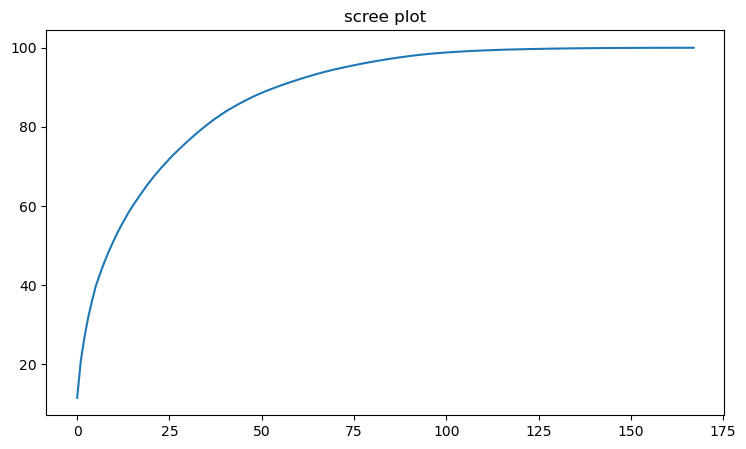

In [314]:
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)
plt.title('scree plot')


In [315]:
#PCA and Logistic Regression


In [316]:
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)


In [317]:
y_train=y_train.round()
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

0.8235294117647058

In [318]:
X_train.shape


(15759, 168)

In [319]:
#Evaluate on test data

In [320]:
y_test=y_test.round()
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
# sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
# print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


[[3920  899]
 [  80  355]]
AUC:    	 0.89


In [321]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      4819
         1.0       0.28      0.82      0.42       435

    accuracy                           0.81      5254
   macro avg       0.63      0.81      0.65      5254
weighted avg       0.92      0.81      0.85      5254



In [322]:
#perform testing on test csv kaggle file

In [323]:
X_test_sub = pd.read_csv('C:/Users/Dell/Desktop/Upgrad/New folder/test.csv')
X_test_sub.shape


(30000, 171)

In [324]:
X_test_sub.head()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [325]:
final_col=list(X_train.columns)


In [326]:
len(final_col)


168

In [327]:
adn_col =[]
for col in final_col:
    if col not in list(X_test_sub.columns):
        adn_col.append(col)


In [328]:
len(adn_col)


23

In [329]:
del_col =[]
for col in X_test_sub.columns:
    if col not in final_col:
        del_col.append(col)


In [330]:
X_test_sub = X_test_sub.drop(del_col, axis=1)


In [331]:
len(X_test_sub.columns)


145

In [332]:
X_test_sub['arpu_diff'] = X_test_sub.arpu_8 - ((X_test_sub.arpu_6 + X_test_sub.arpu_7)/2)

X_test_sub['onnet_mou_diff'] = X_test_sub.onnet_mou_8 - ((X_test_sub.onnet_mou_6 + X_test_sub.onnet_mou_7)/2)

X_test_sub['offnet_mou_diff'] = X_test_sub.offnet_mou_8 - ((X_test_sub.offnet_mou_6 + X_test_sub.offnet_mou_7)/2)

X_test_sub['roam_ic_mou_diff'] = X_test_sub.roam_ic_mou_8 - ((X_test_sub.roam_ic_mou_6 + X_test_sub.roam_ic_mou_7)/2)

X_test_sub['roam_og_mou_diff'] = X_test_sub.roam_og_mou_8 - ((X_test_sub.roam_og_mou_6 + X_test_sub.roam_og_mou_7)/2)

X_test_sub['loc_og_mou_diff'] = X_test_sub.loc_og_mou_8 - ((X_test_sub.loc_og_mou_6 + X_test_sub.loc_og_mou_7)/2)

X_test_sub['std_og_mou_diff'] = X_test_sub.std_og_mou_8 - ((X_test_sub.std_og_mou_6 + X_test_sub.std_og_mou_7)/2)

X_test_sub['isd_og_mou_diff'] = X_test_sub.isd_og_mou_8 - ((X_test_sub.isd_og_mou_6 + X_test_sub.isd_og_mou_7)/2)

X_test_sub['spl_og_mou_diff'] = X_test_sub.spl_og_mou_8 - ((X_test_sub.spl_og_mou_6 + X_test_sub.spl_og_mou_7)/2)

X_test_sub['total_og_mou_diff'] = X_test_sub.total_og_mou_8 - ((X_test_sub.total_og_mou_6 + X_test_sub.total_og_mou_7)/2)

X_test_sub['loc_ic_mou_diff'] = X_test_sub.loc_ic_mou_8 - ((X_test_sub.loc_ic_mou_6 + X_test_sub.loc_ic_mou_7)/2)

X_test_sub['std_ic_mou_diff'] = X_test_sub.std_ic_mou_8 - ((X_test_sub.std_ic_mou_6 + X_test_sub.std_ic_mou_7)/2)

X_test_sub['isd_ic_mou_diff'] = X_test_sub.isd_ic_mou_8 - ((X_test_sub.isd_ic_mou_6 + X_test_sub.isd_ic_mou_7)/2)

X_test_sub['spl_ic_mou_diff'] = X_test_sub.spl_ic_mou_8 - ((X_test_sub.spl_ic_mou_6 + X_test_sub.spl_ic_mou_7)/2)

X_test_sub['total_ic_mou_diff'] = X_test_sub.total_ic_mou_8 - ((X_test_sub.total_ic_mou_6 + X_test_sub.total_ic_mou_7)/2)

X_test_sub['total_rech_num_diff'] = X_test_sub.total_rech_num_8 - ((X_test_sub.total_rech_num_6 + X_test_sub.total_rech_num_7)/2)

X_test_sub['total_rech_amt_diff'] = X_test_sub.total_rech_amt_8 - ((X_test_sub.total_rech_amt_6 + X_test_sub.total_rech_amt_7)/2)

X_test_sub['max_rech_amt_diff'] = X_test_sub.max_rech_amt_8 - ((X_test_sub.max_rech_amt_6 + X_test_sub.max_rech_amt_7)/2)

X_test_sub['total_rech_data_diff'] = X_test_sub.total_rech_data_8 - ((X_test_sub.total_rech_data_6 + X_test_sub.total_rech_data_7)/2)

X_test_sub['max_rech_data_diff'] = X_test_sub.max_rech_data_8 - ((X_test_sub.max_rech_data_6 + X_test_sub.max_rech_data_7)/2)

X_test_sub['av_rech_amt_data_diff'] = X_test_sub.av_rech_amt_data_8 - ((X_test_sub.av_rech_amt_data_6 + X_test_sub.av_rech_amt_data_7)/2)

X_test_sub['vol_2g_mb_diff'] = X_test_sub.vol_2g_mb_8 - ((X_test_sub.vol_2g_mb_6 + X_test_sub.vol_2g_mb_7)/2)

X_test_sub['vol_3g_mb_diff'] = X_test_sub.vol_3g_mb_8 - ((X_test_sub.vol_3g_mb_6 + X_test_sub.vol_3g_mb_7)/2)


In [333]:
X_test_sub.shape


(30000, 168)

In [334]:
X_train.shape


(15759, 168)

In [335]:
X_train.head()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
13528,559.135,508.842,553.107,597.83,448.53,594.29,149.26,175.73,299.99,4.18,13.13,32.68,29.63,59.81,84.23,7.46,2.33,2.51,59.84,38.71,43.48,0.86,0.0,0.00,0.0,0.00,0.00,68.18,41.04,45.99,572.43,434.16,569.78,76.84,89.23,194.28,0.00,0.0,0.0,0.0,0.0,0.0,649.28,523.39,764.06,0.0,0.0,0.00,1.38,2.86,1.00,2.31,0.0,0.0,721.16,567.31,811.06,11.94,4.88,17.83,87.84000,56.73,36.28,6.81,3.30,0.00,106.61,64.91,54.11,9.38,4.88,1.03,48.83,38.16,19.51,0.00,0.00,0.00,0.0,0.0,0.0,58.21,43.04,20.54,164.83,107.96,74.66,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,10.0,10.0,9.0,738.0,526.0,677.0,128.0,110.0,150.0,110.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.091037,0.106008,0.129077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091037,0.106008,0.129077,2984.0,0.00,0.0,0.00,19.1185,71.110,137.495,24.025,39.510,-8.620,177.725,0.00,-1.120,166.825,-31.650,-30.085,0.00,0.0,-61.735,-1.0,45.0,31.0,0.0,0.0,0.0,0.000,0.00
7183,381.035,660.847,199.111,364.79,617.33,51.71,124.69,258.86,40.08,0.00,6.49,15.59,0.00,33.03,91.79,7.38,25.64,0.00,70.74,170.03,0.00,0.00,0.0,0.00,0.0,0.98,0.00,78.13,195.68,0.00,357.41,561.24,0.00,53.94,84.58,0.00,0.00,0.0,0.0,0.0,0.0,0.0,411.36,645.83,0.00,0.0,0.0,0.00,0.00,1.64,0.00,0.00,0.0,0.0,489.49,843.16,0.00,4.49,25.14,0.00,25.56000,105.31,0.00,0.00,0.00,0.00,30.06,130.46,0.00,16.83,8.53,0.00,0.00,1.26,0.00,0.00,25.34,0.00,0.0,0.0,0.0,16.83,35.14,0.00,71.51,207.24,0.00,0.0,0.0,0.0,24.61,41.63,0.00,0.00,0.00,0.00,19.0,27.0,5.0,4

In [336]:
X_test_sub.head()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00,-14.1610,-2.895,-11.330,0.000,0.000,-14.430,0.175,0.0,0.030,-14.225,-9.975,3.640,0.000,-0.05,-6.385,-1.0,-36.5,-10.0,NaN,NaN,NaN,0.0,0.0
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,250,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2533,0.00,0.

In [337]:
X_test_sub.isna().any()


arpu_6                   False
arpu_7                   False
arpu_8                   False
onnet_mou_6               True
onnet_mou_7               True
                         ...  
total_rech_data_diff      True
max_rech_data_diff        True
av_rech_amt_data_diff     True
vol_2g_mb_diff           False
vol_3g_mb_diff           False
Length: 168, dtype: bool

In [338]:
nan_test_list = X_test_sub.columns[X_test_sub.isna().any()].tolist()
for i in nan_test_list:
    
    X_test_sub[i] = X_test_sub[i].fillna(0)


In [339]:
X_test_sub.isna().any()


arpu_6                   False
arpu_7                   False
arpu_8                   False
onnet_mou_6              False
onnet_mou_7              False
                         ...  
total_rech_data_diff     False
max_rech_data_diff       False
av_rech_amt_data_diff    False
vol_2g_mb_diff           False
vol_3g_mb_diff           False
Length: 168, dtype: bool

In [340]:
mapping = {'night_pck_user_6' : {-1:  0.091037, 0: 0.061534, 1: 0.110355},
           'night_pck_user_7' : {-1: 0.106008, 0: 0.051774, 1: 0.049518},
           'night_pck_user_8' : {-1: 0.129077, 0: 0.027976, 1: 0.019661},
           'fb_user_6'        : {-1: 0.091037, 0: 0.067671, 1: 0.062284},
           'fb_user_7'        : {-1: 0.106008, 0: 0.059332, 1: 0.051071},
           'fb_user_8'        : {-1: 0.129077, 0: 0.071381, 1: 0.022682}
          }
#X_train.replace(mapping, inplace = True)
X_test_sub.replace(mapping, inplace = True)


In [341]:
y_pred = pipeline.predict(X_test_sub)


In [342]:
X_test_sub.shape


(30000, 168)

In [343]:
len(y_pred)


30000

In [344]:
id = range(69999, 69999+30000)


In [345]:
len(id)


30000

In [346]:
df_res = pd.DataFrame(
    {'id': id,
     'churn_probability': y_pred
     
    })

In [347]:
df_res.to_csv("submissions_Nagendra_J_Rakesh_c.csv", index = False)


In [348]:
df_res.tail()


,id,churn_probability
29995,99994,0.0
29996,99995,0.0
29997,99996,0.0
29998,99997,1.0
29999,99998,0.0


In [349]:
#Hyperparameter tuning - PCA and Logistic Regression

In [350]:
y_train.value_counts()/y_train.shape


0.0    0.917254
1.0    0.082746
Name: churn_probability, dtype: float64

In [351]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [352]:
# fit model
model.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [353]:
df_result = pd.DataFrame(model.cv_results_) 


In [354]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)


Best AUC:  0.8983719630308927
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [355]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
# sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
# print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


[[4085  734]
 [  86  349]]
AUC:    	 0.89


In [356]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      4819
         1.0       0.32      0.80      0.46       435

    accuracy                           0.84      5254
   macro avg       0.65      0.82      0.68      5254
weighted avg       0.92      0.84      0.87      5254



In [357]:
#Random Forest

In [358]:
X_train.columns


Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=168)

In [359]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [360]:
# fit model
model.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [361]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)


Best AUC:  0.9270640150438932
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [362]:
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


[[4728   91]
 [ 221  214]]
AUC:    	 0.93


In [363]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      4819
         1.0       0.70      0.49      0.58       435

    accuracy                           0.94      5254
   macro avg       0.83      0.74      0.77      5254
weighted avg       0.93      0.94      0.94      5254



In [364]:
#kaggle csv testing for Random forest

In [365]:
X_test_sub = pd.read_csv("C:/Users/Dell/Desktop/Upgrad/New folder/test.csv")
X_test_sub.shape
final_col=list(X_train.columns)
final_col


(30000, 171)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'to

In [366]:
len(final_col)


168

In [367]:
adn_col =[]
for col in final_col:
    if col not in list(X_test_sub.columns):
        adn_col.append(col)
len(adn_col)


23

In [368]:
del_col =[]
for col in X_test_sub.columns:
    if col not in final_col:
        del_col.append(col)
X_test_sub = X_test_sub.drop(del_col, axis=1)

len(X_test_sub.columns) 


145

In [369]:
X_test_sub['arpu_diff'] = X_test_sub.arpu_8 - ((X_test_sub.arpu_6 + X_test_sub.arpu_7)/2)

X_test_sub['onnet_mou_diff'] = X_test_sub.onnet_mou_8 - ((X_test_sub.onnet_mou_6 + X_test_sub.onnet_mou_7)/2)

X_test_sub['offnet_mou_diff'] = X_test_sub.offnet_mou_8 - ((X_test_sub.offnet_mou_6 + X_test_sub.offnet_mou_7)/2)

X_test_sub['roam_ic_mou_diff'] = X_test_sub.roam_ic_mou_8 - ((X_test_sub.roam_ic_mou_6 + X_test_sub.roam_ic_mou_7)/2)

X_test_sub['roam_og_mou_diff'] = X_test_sub.roam_og_mou_8 - ((X_test_sub.roam_og_mou_6 + X_test_sub.roam_og_mou_7)/2)

X_test_sub['loc_og_mou_diff'] = X_test_sub.loc_og_mou_8 - ((X_test_sub.loc_og_mou_6 + X_test_sub.loc_og_mou_7)/2)

X_test_sub['std_og_mou_diff'] = X_test_sub.std_og_mou_8 - ((X_test_sub.std_og_mou_6 + X_test_sub.std_og_mou_7)/2)

X_test_sub['isd_og_mou_diff'] = X_test_sub.isd_og_mou_8 - ((X_test_sub.isd_og_mou_6 + X_test_sub.isd_og_mou_7)/2)

X_test_sub['spl_og_mou_diff'] = X_test_sub.spl_og_mou_8 - ((X_test_sub.spl_og_mou_6 + X_test_sub.spl_og_mou_7)/2)

X_test_sub['total_og_mou_diff'] = X_test_sub.total_og_mou_8 - ((X_test_sub.total_og_mou_6 + X_test_sub.total_og_mou_7)/2)

X_test_sub['loc_ic_mou_diff'] = X_test_sub.loc_ic_mou_8 - ((X_test_sub.loc_ic_mou_6 + X_test_sub.loc_ic_mou_7)/2)

X_test_sub['std_ic_mou_diff'] = X_test_sub.std_ic_mou_8 - ((X_test_sub.std_ic_mou_6 + X_test_sub.std_ic_mou_7)/2)

X_test_sub['isd_ic_mou_diff'] = X_test_sub.isd_ic_mou_8 - ((X_test_sub.isd_ic_mou_6 + X_test_sub.isd_ic_mou_7)/2)

X_test_sub['spl_ic_mou_diff'] = X_test_sub.spl_ic_mou_8 - ((X_test_sub.spl_ic_mou_6 + X_test_sub.spl_ic_mou_7)/2)

X_test_sub['total_ic_mou_diff'] = X_test_sub.total_ic_mou_8 - ((X_test_sub.total_ic_mou_6 + X_test_sub.total_ic_mou_7)/2)

X_test_sub['total_rech_num_diff'] = X_test_sub.total_rech_num_8 - ((X_test_sub.total_rech_num_6 + X_test_sub.total_rech_num_7)/2)

X_test_sub['total_rech_amt_diff'] = X_test_sub.total_rech_amt_8 - ((X_test_sub.total_rech_amt_6 + X_test_sub.total_rech_amt_7)/2)

X_test_sub['max_rech_amt_diff'] = X_test_sub.max_rech_amt_8 - ((X_test_sub.max_rech_amt_6 + X_test_sub.max_rech_amt_7)/2)

X_test_sub['total_rech_data_diff'] = X_test_sub.total_rech_data_8 - ((X_test_sub.total_rech_data_6 + X_test_sub.total_rech_data_7)/2)

X_test_sub['max_rech_data_diff'] = X_test_sub.max_rech_data_8 - ((X_test_sub.max_rech_data_6 + X_test_sub.max_rech_data_7)/2)

X_test_sub['av_rech_amt_data_diff'] = X_test_sub.av_rech_amt_data_8 - ((X_test_sub.av_rech_amt_data_6 + X_test_sub.av_rech_amt_data_7)/2)

X_test_sub['vol_2g_mb_diff'] = X_test_sub.vol_2g_mb_8 - ((X_test_sub.vol_2g_mb_6 + X_test_sub.vol_2g_mb_7)/2)

X_test_sub['vol_3g_mb_diff'] = X_test_sub.vol_3g_mb_8 - ((X_test_sub.vol_3g_mb_6 + X_test_sub.vol_3g_mb_7)/2)

In [370]:
X_test_sub.shape


(30000, 168)

In [371]:
X_test_sub.isna().any()


arpu_6                   False
arpu_7                   False
arpu_8                   False
onnet_mou_6               True
onnet_mou_7               True
                         ...  
total_rech_data_diff      True
max_rech_data_diff        True
av_rech_amt_data_diff     True
vol_2g_mb_diff           False
vol_3g_mb_diff           False
Length: 168, dtype: bool

In [372]:
nan_test_list = X_test_sub.columns[X_test_sub.isna().any()].tolist()
for i in nan_test_list:
    
    X_test_sub[i] = X_test_sub[i].fillna(0)


In [373]:
X_test_sub.isna().any()


arpu_6                   False
arpu_7                   False
arpu_8                   False
onnet_mou_6              False
onnet_mou_7              False
                         ...  
total_rech_data_diff     False
max_rech_data_diff       False
av_rech_amt_data_diff    False
vol_2g_mb_diff           False
vol_3g_mb_diff           False
Length: 168, dtype: bool

In [374]:
mapping = {'night_pck_user_6' : {-1:  0.091037, 0: 0.061534, 1: 0.110355},
           'night_pck_user_7' : {-1: 0.106008, 0: 0.051774, 1: 0.049518},
           'night_pck_user_8' : {-1: 0.129077, 0: 0.027976, 1: 0.019661},
           'fb_user_6'        : {-1: 0.091037, 0: 0.067671, 1: 0.062284},
           'fb_user_7'        : {-1: 0.106008, 0: 0.059332, 1: 0.051071},
           'fb_user_8'        : {-1: 0.129077, 0: 0.071381, 1: 0.022682}
          }
#X_train.replace(mapping, inplace = True)
X_test_sub.replace(mapping, inplace = True)

In [375]:
y_pred = model.predict(X_test_sub)
df_res = pd.DataFrame(
    {'id': id,
     'churn_probability': y_pred
     
    })


In [376]:
df_res.to_csv("Random_forest_submissions_Nagendra_J_Rakesh_C.csv", index = False)


In [377]:
#The best model is Random forest with accuracy of 0.94

In [378]:
#Choosing best features

In [379]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)


13


In [380]:
# fit model
rf_model.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.6s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [381]:
rf_model.oob_score_


0.9419379402246335

In [382]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
# sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
# print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

print(classification_report(y_test, y_pred))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[[4745   74]
 [ 234  201]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ROC:    	 0.93
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      4819
         1.0       0.73      0.46      0.57       435

    accuracy                           0.94      5254
   macro avg       0.84      0.72      0.77      5254
weighted avg       0.93      0.94      0.94      5254



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [383]:
#Feature Importance

In [384]:
# predictors
features = df_churn_filtered.drop('churn_probability', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance


Sum of importance= 99.99999999999999


,variables,importance_percentage
0,total_ic_mou_8,5.851964
1,loc_ic_mou_8,5.671870
2,loc_og_t2m_mou_8,3.497511
3,loc_ic_t2m_mou_8,3.467578
4,loc_og_mou_8,3.001499
...,...,...
163,std_ic_t2o_mou_6,0.000000
164,std_og_t2c_mou_6,0.000000
165,std_og_t2c_mou_7,0.000000
166,std_og_t2c_mou_8,0.000000


In [385]:
##Extracting top 30 features

<AxesSubplot:>

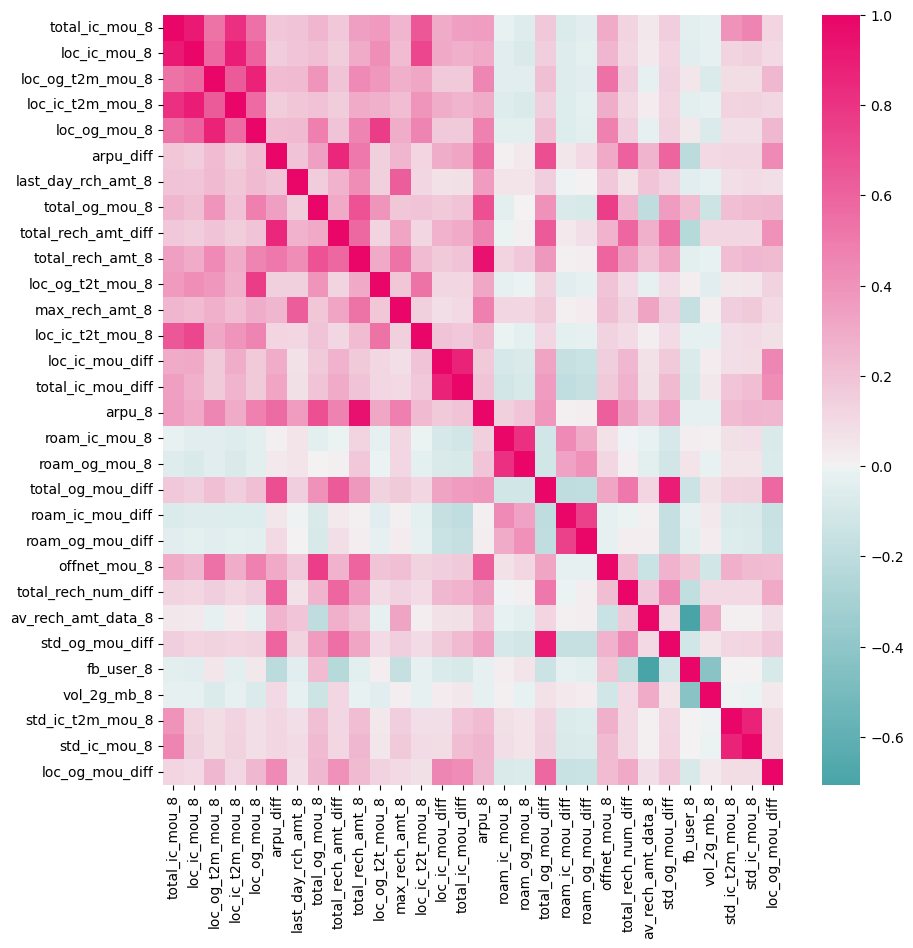

In [386]:
top_n = 30
top_features = feature_importance.variables[0:top_n]
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)


In [387]:
###top_features

In [388]:
#top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
#                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']

top_features_10 = top_features[0:9]

X_train = X_train[top_features_10]
X_test = X_test[top_features_10]


In [389]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [390]:
 len(top_features_10)


9

In [391]:
# fit model
model.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [392]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)


Best AUC:  0.870941852021421
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [406]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


[[3964  855]
 [ 100  335]]
ROC:    	 0.85


In [394]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      4819
         1.0       0.28      0.77      0.41       435

    accuracy                           0.82      5254
   macro avg       0.63      0.80      0.65      5254
weighted avg       0.92      0.82      0.85      5254



In [395]:
#Extract the intercept and the coefficients from the logistic model

In [405]:
logistic_model = model.best_estimator_.named_steps['logistic']
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])
# coefficients
coefficients = logistic_model.coef_.reshape(9, 1).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,loc_ic_mou_8,loc_og_t2m_mou_8,loc_ic_t2m_mou_8,loc_og_mou_8,arpu_diff,last_day_rch_amt_8,total_og_mou_8,total_rech_amt_diff
0,-1.490875,-0.482281,-0.680075,-0.258217,-0.425098,-0.084777,-0.287468,-0.222731,-0.01796,-0.58333


In [409]:
# Create a submission DataFrame
submission_df = pd.DataFrame({'id': submission['id'], 'churn_probability': y_pred})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('Submission.csv', index=False)

ValueError: array length 5254 does not match index length 30000

In [ ]:
'''Business Insights
Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are 
using services from a roaming zone.

The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and 
ISD packages.

To look into both of the issues stated above, it is desired that the telecom company collects customer query and 
complaint data and work on their services according to the needs of customers.

Based on the investigation done on the data set provided by the telecom company, it was possible to suggest the following 
inferences:

The telecom industry should reduce the tariff for local outgoing calls per minute,so that the customers will not churn

The business should come up with new std and local combo packeges to reduce the customer churn.

The business should give attractive offers to improve the average revenue spent by the customers by adding 
some special packages that could include the roaming waveoff to some extent.

'''

In [ ]:
"""Based on the coefficients obtained from the logistic regression model, we can make the following conclusions:

1. Intercept: The intercept value is approximately -1.560. It represents the log-odds of the baseline probability of churn when all other predictor variables are zero.

2. Feature Coefficients: The coefficients associated with each feature indicate the impact of that feature on the likelihood of churn. Here are the coefficients for each feature:

- total_ic_mou_8: The coefficient is -1.474, suggesting that an increase in the total incoming call minutes in the eighth month reduces the likelihood of churn.
- total_rech_amt_diff: The coefficient is -0.727, indicating that a larger difference in total recharge amount between the eighth and previous months reduces the likelihood of churn.
- total_og_mou_8: The coefficient is -0.943, implying that an increase in the total outgoing call minutes in the eighth month decreases the likelihood of churn.
- arpu_8: The coefficient is 0.064, indicating that a higher average revenue per user in the eighth month increases the likelihood of churn.
- roam_ic_mou_8: The coefficient is -0.015, suggesting that an increase in the total incoming roaming call minutes in the eighth month slightly decreases the likelihood of churn.
- roam_og_mou_8: The coefficient is 0.240, indicating that an increase in the total outgoing roaming call minutes in the eighth month slightly increases the likelihood of churn.
- std_ic_mou_8: The coefficient is 0.162, suggesting that an increase in the total incoming STD call minutes in the eighth month increases the likelihood of churn.
- av_rech_amt_data_8: The coefficient is -0.699, implying that a higher average recharge amount for data usage in the eighth month decreases the likelihood of churn.
- std_og_mou_8: The coefficient is 0.595, indicating that an increase in the total outgoing STD call minutes in the eighth month increases the likelihood of churn.

These coefficients provide insights into the importance and direction of the relationship between the features and churn. Negative coefficients suggest that higher values of the feature are associated with a lower likelihood of churn, while positive coefficients indicate a higher likelihood of churn.

Remember that these conclusions are based on the specific logistic regression model you trained using the provided dataset. It is important to interpret these results within the context of your specific business and dataset.

Make sure to validate the model's performance using appropriate evaluation metrics and consider the domain knowledge and business context to draw meaningful conclusions."""